In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
import bottleneck as bn
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
base = pd.HDFStore('dados/banco_diss.h5')['base/base_all']
x = base.index + 1
folder = '/home/denis/SPIDEROAK/dissertation/Figures/'

Plotar as baselines
------------

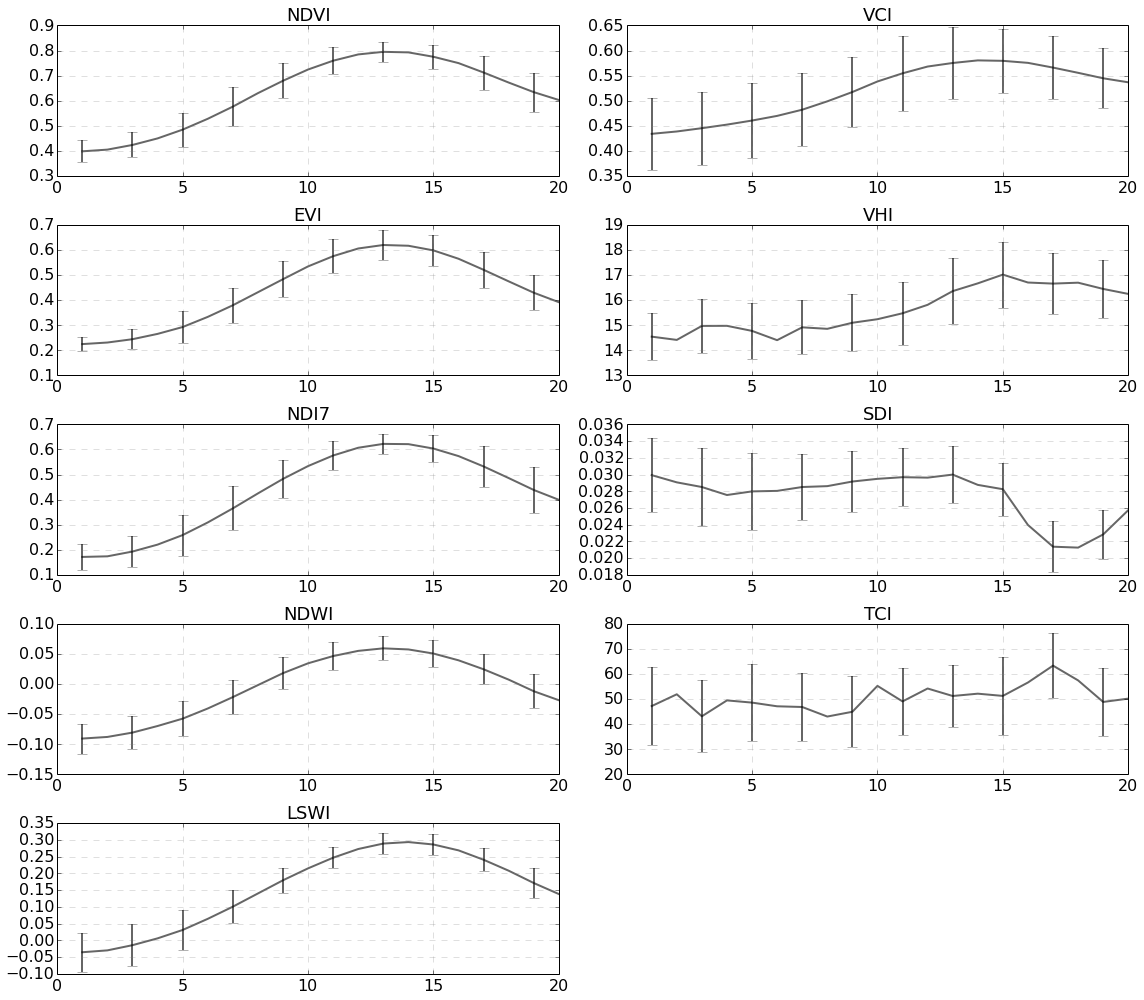

In [9]:
def applyPlotStyle():
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, alpha=0.5, color = '0.5', linestyle='--', linewidth=0.5)
    
#mais propriedades
ee = 2
lw = 2
cs = 5
fs = 18
al = 0.6

plt.figure(figsize=(16,14),  dpi=300)

# aqui são os plots
plt.subplot(5,2,1)
plt.title('NDVI',fontsize=fs)
plt.errorbar(x, base.NDVIm, alpha=al, linewidth=lw, color='k', yerr=base.NDVIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,2)
plt.title('VCI',fontsize=fs)
plt.errorbar(x, base.VCIm, alpha=al,  linewidth=lw, color='k', yerr=base.VCIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,3)
plt.title('EVI',fontsize=fs)
plt.errorbar(x, base.EVIm, alpha=al,  linewidth=lw, color='k', yerr=base.EVIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,4)
plt.title('VHI',fontsize=fs)
plt.errorbar(x, base.VHI_70m,  alpha=al, linewidth=lw, color='k', yerr=base.VHI_70s, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,5)
plt.title('NDI7',fontsize=fs)
plt.errorbar(x, base.NDI7m, alpha=al,  linewidth=lw, color='k', yerr=base.NDI7s, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,6)
plt.title('SDI',fontsize=fs)
plt.errorbar(x, base.SDIm,  alpha=al, linewidth=lw, color='k', yerr=base.SDIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,7)
plt.title('NDWI',fontsize=fs)
plt.errorbar(x, base.NDWIm,  alpha=al, linewidth=lw, color='k', yerr=base.NDWIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,8)
plt.title('TCI',fontsize=fs)
plt.errorbar(x, base.TCIm,  alpha=al, linewidth=lw, color='k', yerr=base.TCIs, errorevery=ee, capsize=cs)
applyPlotStyle()

plt.subplot(5,2,9)
plt.title('LSWI',fontsize=fs)
plt.errorbar(x, base.LSWIm,  alpha=al, linewidth=lw, color='k', yerr=base.LSWIs, errorevery=ee, capsize=cs)
applyPlotStyle()

#apresentando e salvando
plt.tight_layout()
plt.show()

#plt.savefig(folder + 'Fbaselines.pdf', format='pdf')

Plot scatter matrix
--------------------
#### Mas não acho que vá usar

In [5]:
from pandas.tools.plotting import *

In [6]:
base2 = base[['EVIm','NDI7m','NDVIm','NDWIm','LSWIm','SDIm','VCIm','VHI_70m','TCIm']]
base2.columns = ['EVI', 'NDI7', 'NDVI', 'NDWI', 'LSWI','SDI', 'VCI', 'VHI','TCI']

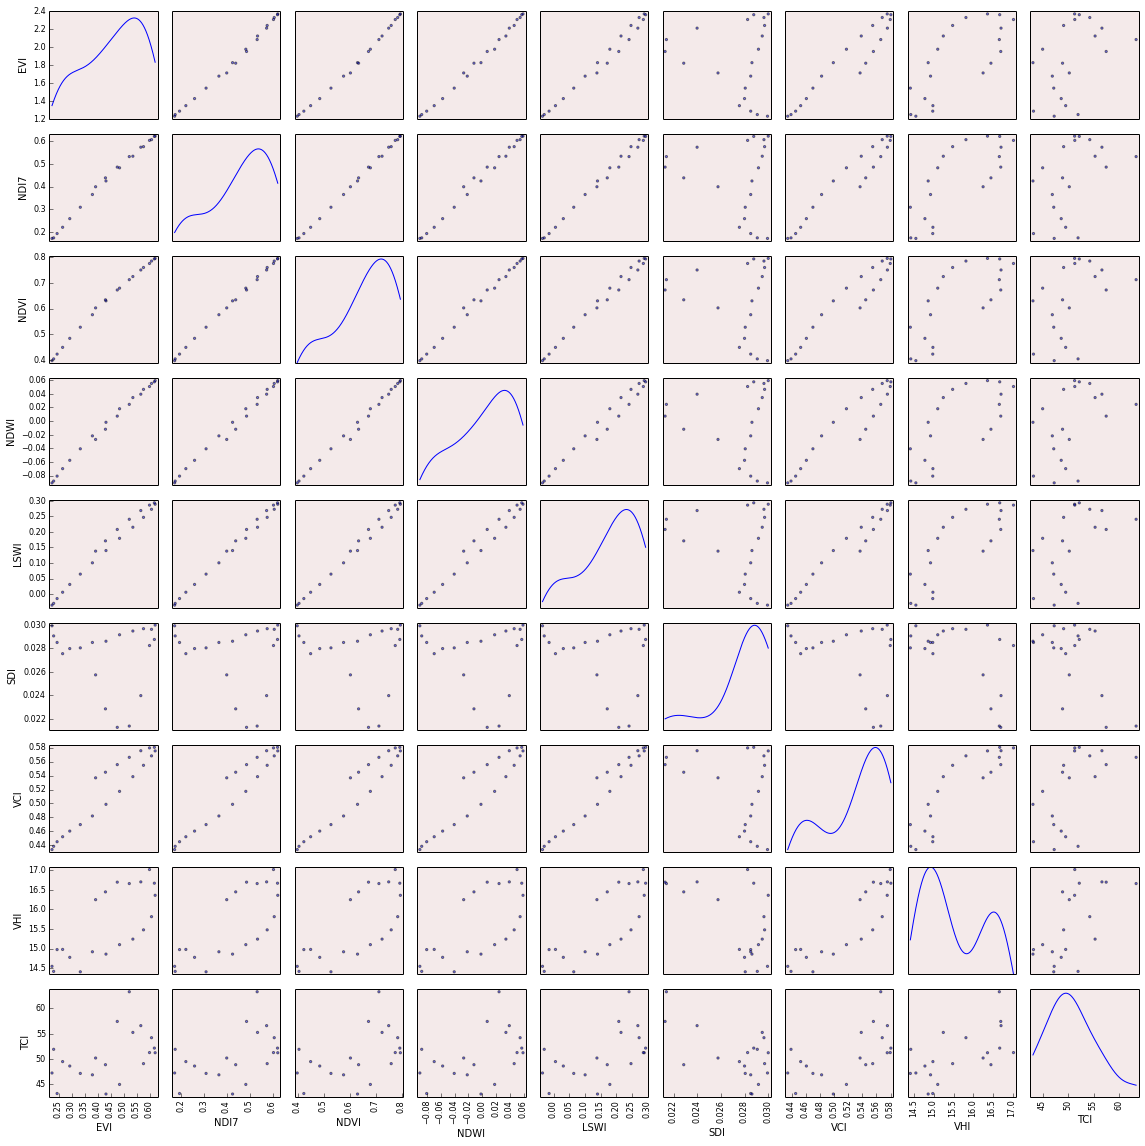

In [7]:
scatter_matrix(base2, diagonal='kde', grid=False, figsize=(16,16))
plt.tight_layout()
plt.show()
#savefig(folder + 'Fscatter_matrix_baseline.pdf', format='pdf', dpi=300)

Correlation plot
----------------
Do seaborn, muito bonito

In [8]:
import seaborn as sns

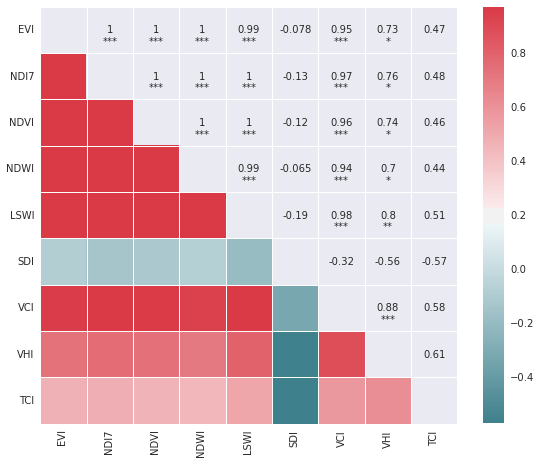

In [10]:
sns.set(style='dark')#white, dark, whitegrid, darkgrid, ticks

f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(210, 10, as_cmap=True)
sns.corrplot(base2, cmap_range=(-0.57,0.97), annot=True, sig_stars=True,
             diag_names=False, sig_corr=True, cmap=cmap, ax=ax)
f.tight_layout()
plt.show()
#savefig(folder + 'Fcorr_baselines.png', format='png', dpi=300)

In [2]:
hdf = pd.HDFStore('dados/banco_diss.h5')

In [4]:
hdf.keys()

['/datas_trabalho',
 '/mann_kendal_meso',
 '/soy_micro_info',
 '/spi3_meso',
 '/spi3_micro',
 '/base/base_all',
 '/ivs/meso/evi',
 '/ivs/meso/lswi',
 '/ivs/meso/ndi7',
 '/ivs/meso/ndvi',
 '/ivs/meso/ndwi',
 '/ivs/meso/sdi',
 '/ivs/meso/vci',
 '/ivs/meso/vhi',
 '/ivs/micro/evi',
 '/ivs/micro/lswi',
 '/ivs/micro/ndi7',
 '/ivs/micro/ndvi',
 '/ivs/micro/ndwi',
 '/ivs/micro/sdi',
 '/ivs/micro/vci',
 '/ivs/micro/vhi',
 '/base/meso2/evi',
 '/base/meso2/lswi',
 '/base/meso2/ndi7',
 '/base/meso2/ndvi',
 '/base/meso2/ndwi',
 '/base/meso2/sdi',
 '/base/meso2/vci',
 '/base/meso2/vhi',
 '/base/micro/evi',
 '/base/micro/lswi',
 '/base/micro/ndi7',
 '/base/micro/ndvi',
 '/base/micro/ndwi',
 '/base/micro/sdi',
 '/base/micro/tci',
 '/base/micro/vci',
 '/base/micro/vhi',
 '/base/micro2/evi',
 '/base/micro2/lswi',
 '/base/micro2/ndi7',
 '/base/micro2/ndvi',
 '/base/micro2/ndwi',
 '/base/micro2/sdi',
 '/base/micro2/vci',
 '/base/micro2/vhi']

In [5]:
a = hdf['/ivs/meso/evi']

In [8]:
cocp = a.COCP.tolist()

In [10]:
len(cocp)

526

(0, 50)

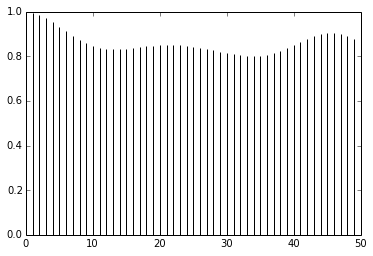

Closing remaining open files:dados/banco_diss.h5...done


In [15]:
plt.acorr(cocp, normed=True, maxlags=50)
plt.xlim(0,50)